## kosis 시군구별 기업수
https://kosis.kr/statHtml/statHtml.do?orgId=142&tblId=DT_BR306&conn_path=I2
- 시별, 구별, 전체, 소상공인, 소기업, 중기업, 중소기업, 대기업

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
companies = pd.read_csv("../../Data/companies/시군구별_기업수_20230207123514.csv", encoding="euc-kr", header=1)

In [4]:
companies

,시군구별(1),시군구별(2),전체,소상공인,소기업,중기업,중소기업,대기업,전체.1,소상공인.1,소기업.1,중기업.1,중소기업.1,대기업.1
0,전국,소계,6898958,6445316,344611,100276,6890203,8755,7295393,6842959,338865,104199,7286023,9370
1,서울,소계,1477925,1359306,83044,31604,1473954,3971,1557659,1440174,80474,32723,1553371,4288
2,서울,종로구,61395,56456,3567,1100,61123,272,62299,57717,3179,1079,61975,324
3,서울,중구,98299,91265,4829,1679,97773,526,96772,90431,4237,1583,96251,521
4,서울,용산구,39695,36293,2122,1127,39542,153,41993,38612,2034,1184,41830,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,경남,거창군,X,7700,265,53,8018,X,X,8185,271,50,8506,X
264,경남,합천군,X,4942,164,31,5137,X,X,5230,166,32,5428,X
265,제주,소계,111076,103576,6202,1228,111006,70,117164,110162,5797,1141,117100,64
266,제주,제주시,79772,74122,4663,939,79724,48,84394,79121,4343,887,84351,43


- row를 시별, 구별, 날짜별로 쌓기

In [5]:
# 시군구별 + 년도 데이터 프레임
title = companies.iloc[:, :2]
# 2019년 타이틀 만들기
title19 = title.copy()
title19['년도'] = 2019
# 2020년 타이틀 만들기
title20 = title
title20['년도'] = 2020

title19

,시군구별(1),시군구별(2),년도
0,전국,소계,2019
1,서울,소계,2019
2,서울,종로구,2019
3,서울,중구,2019
4,서울,용산구,2019
...,...,...,...
263,경남,거창군,2019
264,경남,합천군,2019
265,제주,소계,2019
266,제주,제주시,2019


In [6]:
# 2019년 데이터 자르고 2019 넣기
c2019 = companies.iloc[:, 2:8]

c2019 = pd.concat([title19, c2019], axis=1)
c2019

,시군구별(1),시군구별(2),년도,전체,소상공인,소기업,중기업,중소기업,대기업
0,전국,소계,2019,6898958,6445316,344611,100276,6890203,8755
1,서울,소계,2019,1477925,1359306,83044,31604,1473954,3971
2,서울,종로구,2019,61395,56456,3567,1100,61123,272
3,서울,중구,2019,98299,91265,4829,1679,97773,526
4,서울,용산구,2019,39695,36293,2122,1127,39542,153
...,...,...,...,...,...,...,...,...,...
263,경남,거창군,2019,X,7700,265,53,8018,X
264,경남,합천군,2019,X,4942,164,31,5137,X
265,제주,소계,2019,111076,103576,6202,1228,111006,70
266,제주,제주시,2019,79772,74122,4663,939,79724,48


In [7]:
# 2020년 데이터 자르기
c2020 = companies.iloc[:, 8:]

c2020 = pd.concat([title20, c2020], axis=1)
c2020.columns = c2019.columns
# c2020.iloc[:1, :]
c2020

,시군구별(1),시군구별(2),년도,전체,소상공인,소기업,중기업,중소기업,대기업
0,전국,소계,2020,7295393,6842959,338865,104199,7286023,9370
1,서울,소계,2020,1557659,1440174,80474,32723,1553371,4288
2,서울,종로구,2020,62299,57717,3179,1079,61975,324
3,서울,중구,2020,96772,90431,4237,1583,96251,521
4,서울,용산구,2020,41993,38612,2034,1184,41830,163
...,...,...,...,...,...,...,...,...,...
263,경남,거창군,2020,X,8185,271,50,8506,X
264,경남,합천군,2020,X,5230,166,32,5428,X
265,제주,소계,2020,117164,110162,5797,1141,117100,64
266,제주,제주시,2020,84394,79121,4343,887,84351,43


In [8]:
# 2019, 2020 데이터 합치기
companies_df = pd.concat([c2019, c2020], axis=0)
# 인덱스 리셋
companies_df.reset_index(inplace=True, drop=True)
# 컬럼 이름 바꾸기
companies_df.rename(columns={'시군구별(1)':'시도', '시군구별(2)':'시구군'}, inplace=True)

companies_df.tail()

,시도,시구군,년도,전체,소상공인,소기업,중기업,중소기업,대기업
531,경남,거창군,2020,X,8185,271,50,8506,X
532,경남,합천군,2020,X,5230,166,32,5428,X
533,제주,소계,2020,117164,110162,5797,1141,117100,64
534,제주,제주시,2020,84394,79121,4343,887,84351,43
535,제주,서귀포시,2020,32770,31041,1454,254,32749,21


In [9]:
len(companies_df)

536

In [10]:
pd.unique(companies_df.시도)

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [11]:
pd.unique(companies_df.시구군)

array(['소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '연수구', '남동구',
       '부평구', '계양구', '미추홀구', '강화군', '옹진군', '광산구', '유성구', '대덕구', '울주군',
       '세종시', '수원시 장안구', '수원시 권선구', '수원시 팔달구', '수원시 영통구', '성남시 수정구',
       '성남시 중원구', '성남시 분당구', '의정부시', '안양시 만안구', '안양시 동안구', '부천시', '광명시',
       '평택시', '동두천시', '안산시 상록구', '안산시 단원구', '고양시 덕양구', '고양시 일산동구',
       '고양시 일산서구', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시',
       '하남시', '용인시 처인구', '용인시 기흥구', '용인시 수지구', '파주시', '이천시', '안성시', '김포시',
       '화성시', '광주시', '양주시', '포천시', '여주시', '연천군', '가평군', '양평군', '춘천시',
       '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군',
       '평창군', '정선군', '철원군', '화천군', '양구군', '인제군', '고성군', '양양군', '충주시',
       '제천시', '청주

### null 확인

In [12]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      536 non-null    object
 1   시구군     536 non-null    object
 2   년도      536 non-null    int64 
 3   전체      536 non-null    object
 4   소상공인    536 non-null    int64 
 5   소기업     536 non-null    object
 6   중기업     536 non-null    object
 7   중소기업    536 non-null    int64 
 8   대기업     536 non-null    object
dtypes: int64(3), object(6)
memory usage: 37.8+ KB


- object: 전체, 소기업, 중기업, 대기업 
- 데이터에 X가 포함되어 있으므로 int가 아닌 object로 나오는 컬럼을 일단 0으로 바꿔보자.

In [13]:
companies_df.replace('X', 0, inplace=True)
companies_df.replace('-', 0, inplace=True)
companies_df = companies_df.iloc[1:, :]
companies_df

,시도,시구군,년도,전체,소상공인,소기업,중기업,중소기업,대기업
1,서울,소계,2019,1477925,1359306,83044,31604,1473954,3971
2,서울,종로구,2019,61395,56456,3567,1100,61123,272
3,서울,중구,2019,98299,91265,4829,1679,97773,526
4,서울,용산구,2019,39695,36293,2122,1127,39542,153
5,서울,성동구,2019,47098,42207,3395,1436,47038,60
...,...,...,...,...,...,...,...,...,...
531,경남,거창군,2020,0,8185,271,50,8506,0
532,경남,합천군,2020,0,5230,166,32,5428,0
533,제주,소계,2020,117164,110162,5797,1141,117100,64
534,제주,제주시,2020,84394,79121,4343,887,84351,43


In [14]:
companies_df.drop(268, inplace=True)

In [15]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 1 to 535
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      534 non-null    object
 1   시구군     534 non-null    object
 2   년도      534 non-null    int64 
 3   전체      534 non-null    object
 4   소상공인    534 non-null    int64 
 5   소기업     534 non-null    object
 6   중기업     534 non-null    object
 7   중소기업    534 non-null    int64 
 8   대기업     534 non-null    object
dtypes: int64(3), object(6)
memory usage: 41.7+ KB


#### 숫자로 형변환

In [24]:
companies_df = companies_df.astype({'전체':'int64', '소기업':'int64', '중기업':'int64', '대기업':'int64'})
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 1 to 535
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      534 non-null    object
 1   시구군     534 non-null    object
 2   년도      534 non-null    int64 
 3   전체      534 non-null    int64 
 4   소상공인    534 non-null    int64 
 5   소기업     534 non-null    int64 
 6   중기업     534 non-null    int64 
 7   중소기업    534 non-null    int64 
 8   대기업     534 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 41.7+ KB


In [25]:
companies_df[companies_df['시구군'] == '소계']

,시도,시구군,년도,전체,소상공인,소기업,중기업,중소기업,대기업
1,서울,소계,2019,1477925,1359306,83044,31604,1473954,3971
27,부산,소계,2019,441371,413447,21039,6490,440976,395
44,대구,소계,2019,309606,291523,14060,3853,309436,170
53,인천,소계,2019,354244,331733,17228,5003,353964,280
64,광주,소계,2019,181480,170319,8434,2539,181292,188
70,대전,소계,2019,178460,167082,9141,2130,178353,107
76,울산,소계,2019,127885,119592,6611,1538,127741,144
82,세종,소계,2019,34660,32657,1542,414,34613,47
84,경기,소계,2019,1707867,1590433,89629,26045,1706107,1760
127,강원,소계,2019,211199,200645,8883,1547,211075,124


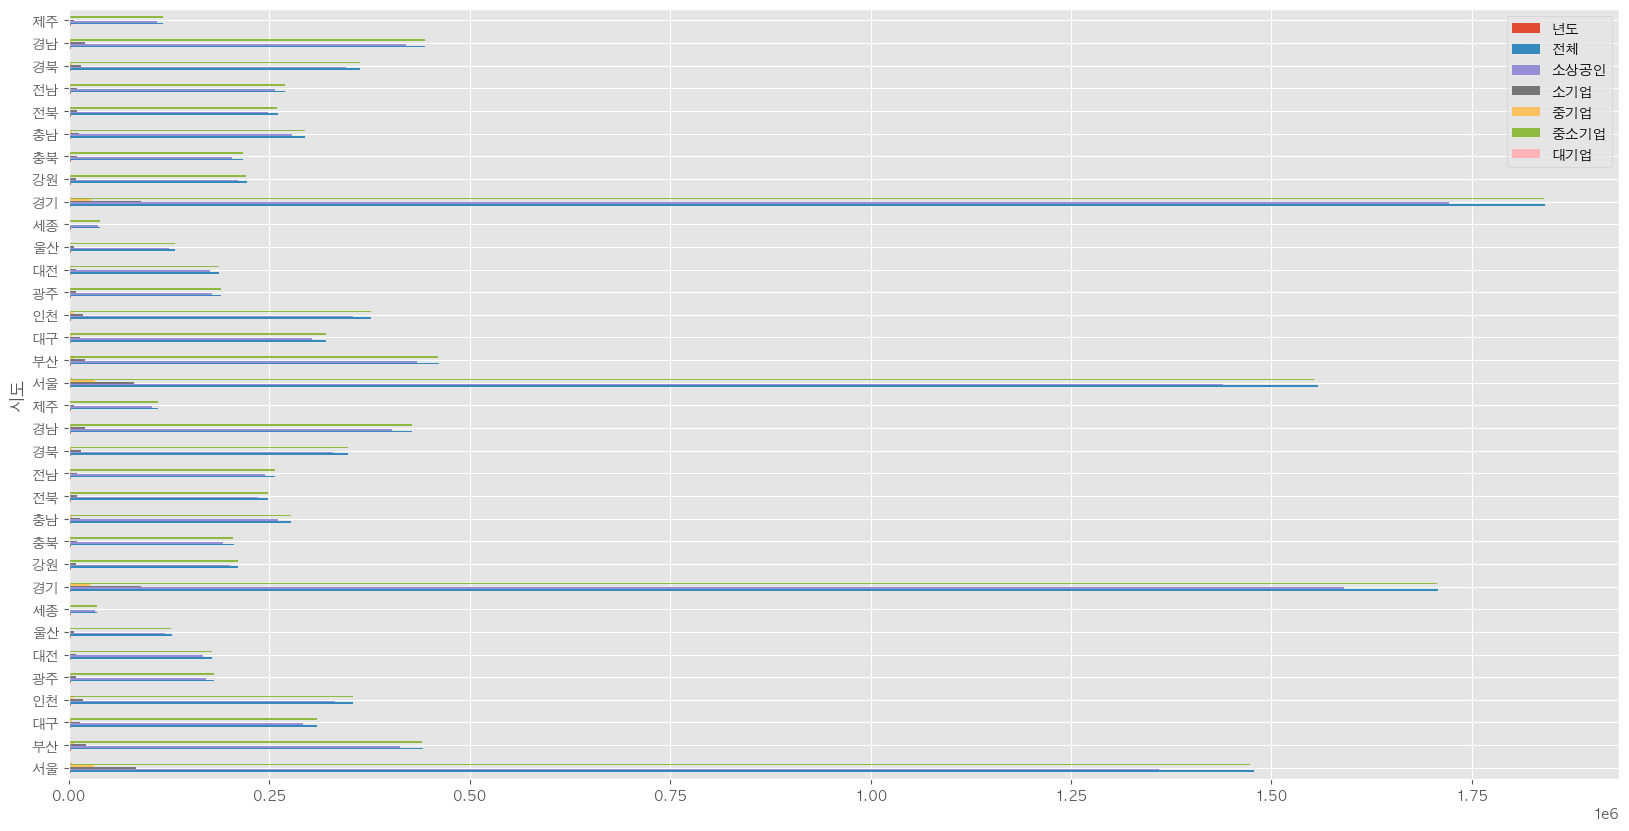

In [26]:
plt.style.use('ggplot')
companies_df[companies_df['시구군'] == '소계'].plot(
    x='시도',
    kind='barh', #barh: 옆으로 돌린 그래프
    figsize=(20,10),
)

plt.show()

In [140]:
companies_df[(companies_df['시구군'] == '소계') & (companies_df['년도'] == 2019)]

,시도,시구군,년도,전체,소상공인,소기업,중기업,중소기업,대기업
1,서울,소계,2019,1477925,1359306,83044,31604,1473954,3971
27,부산,소계,2019,441371,413447,21039,6490,440976,395
44,대구,소계,2019,309606,291523,14060,3853,309436,170
53,인천,소계,2019,354244,331733,17228,5003,353964,280
64,광주,소계,2019,181480,170319,8434,2539,181292,188
70,대전,소계,2019,178460,167082,9141,2130,178353,107
76,울산,소계,2019,127885,119592,6611,1538,127741,144
82,세종,소계,2019,34660,32657,1542,414,34613,47
84,경기,소계,2019,1707867,1590433,89629,26045,1706107,1760
127,강원,소계,2019,211199,200645,8883,1547,211075,124


### 2019년 기업수(기업 전체, 시도별) 막대 그래프

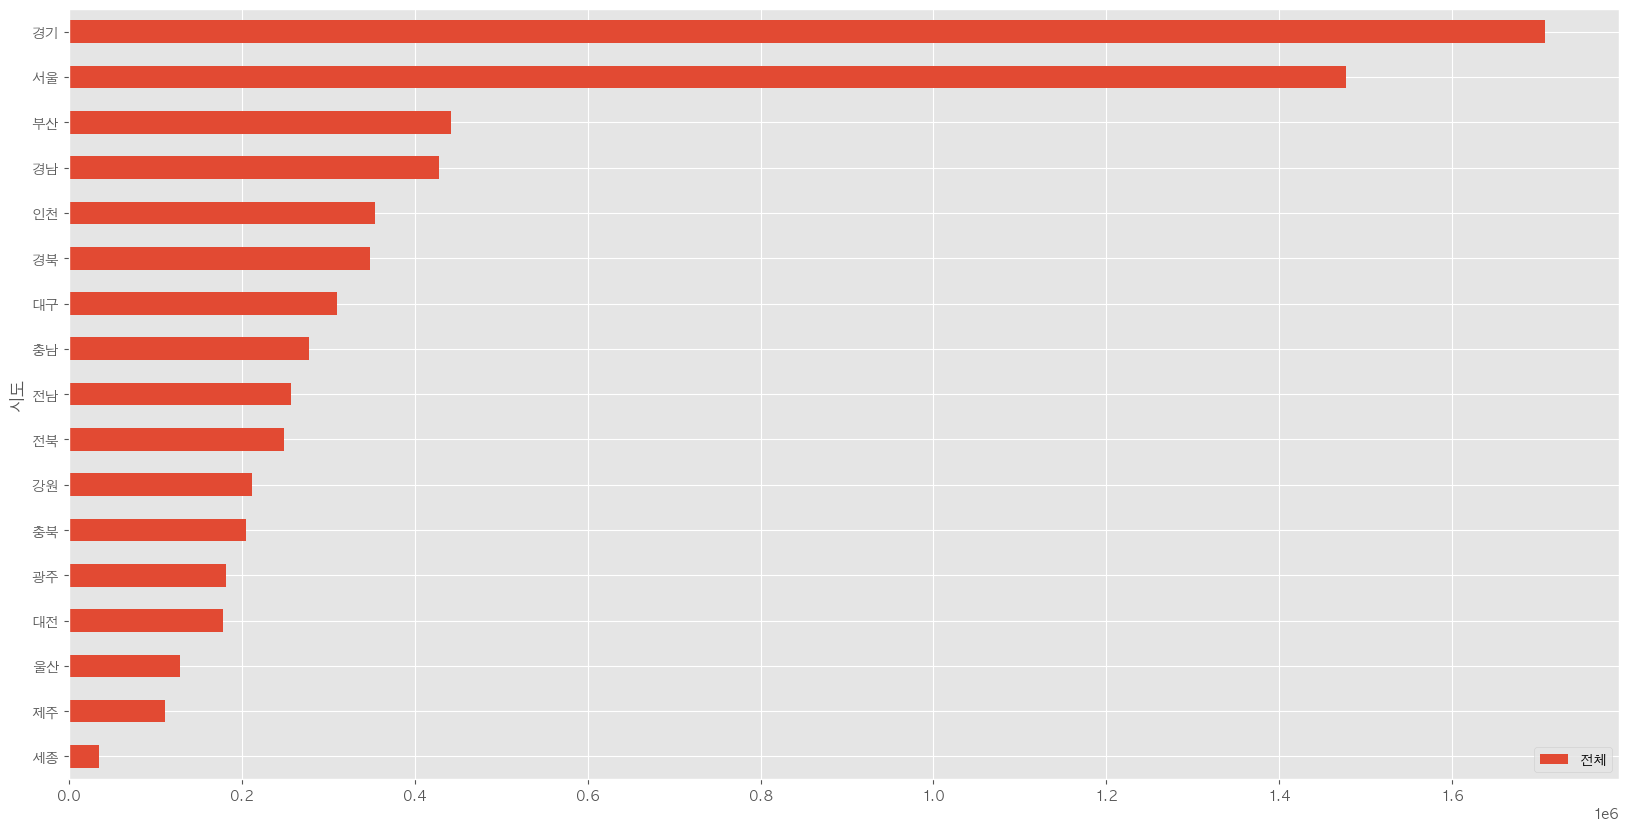

In [36]:
companies_df[(companies_df['시구군'] == '소계') & (companies_df['년도'] == 2019)].sort_values(by='전체').plot(
    x='시도',
    y='전체',
    kind='barh', #barh: 옆으로 돌린 그래프
    figsize=(20,10),
)

plt.show()

### 2020년 기업수(기업 전체, 시도별)

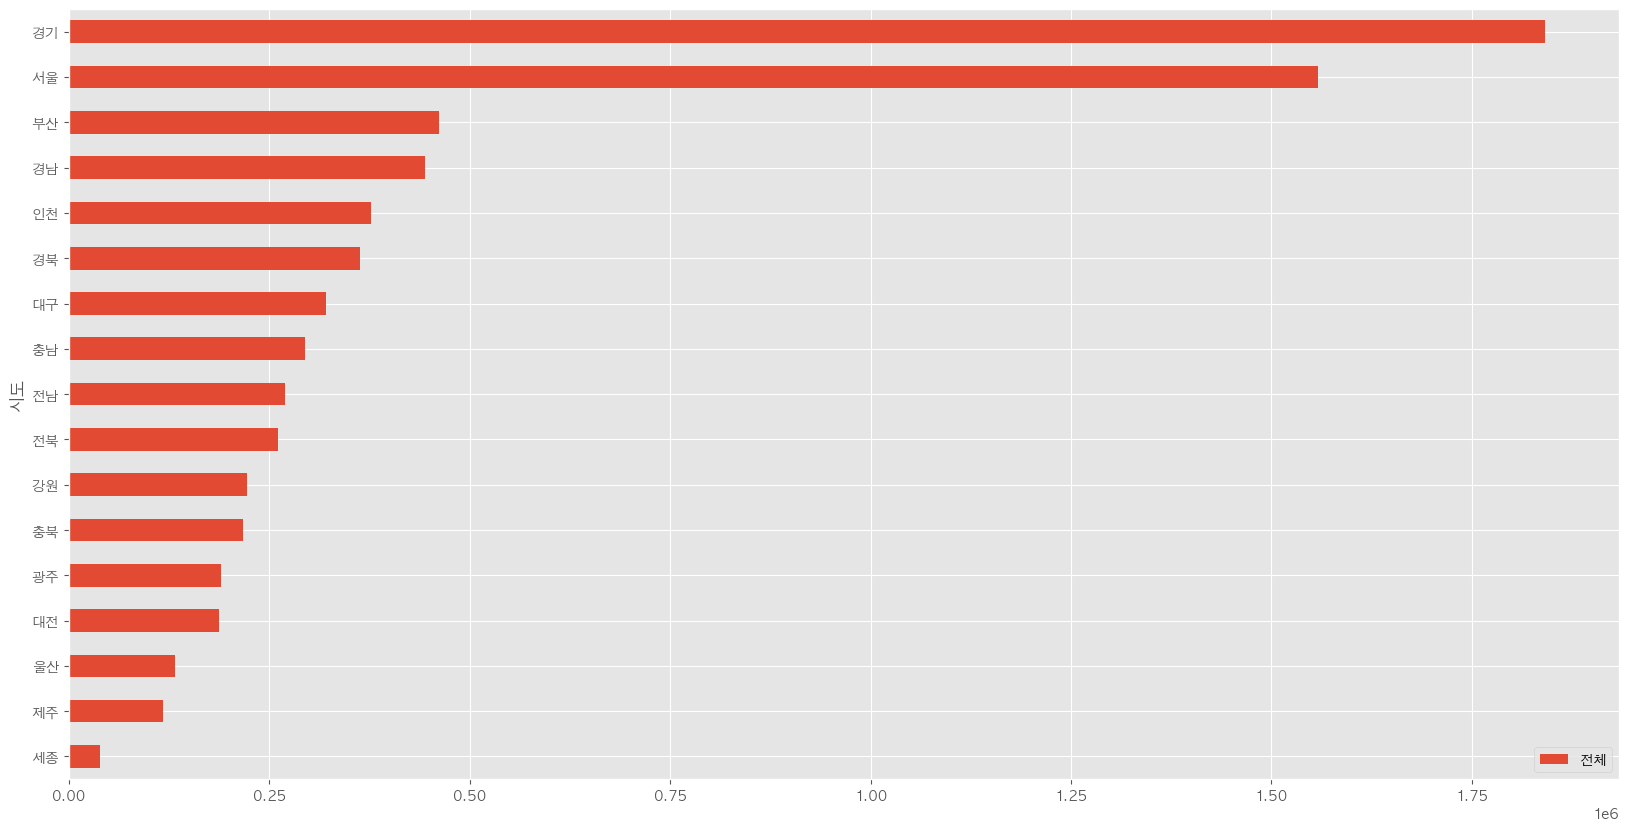

In [29]:
companies_df[(companies_df['시구군'] == '소계') & (companies_df['년도'] == 2020)].sort_values(by='전체').plot(
    x='시도',
    y='전체',
    kind='barh', #barh: 옆으로 돌린 그래프
    figsize=(20,10),
)

plt.show()